<a href="https://colab.research.google.com/github/AMorQ/Statistics/blob/main/R_for_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R
-------
# The basics

## Variables:
  **Numeric**

    numeric: Represents real numbers. Default data type for numbers in R.

    integer: Represents whole numbers. To create an integer, you need to append L to the number.
      Example: z <- 5L

  **Character**

    Represents text strings. Strings are enclosed in single or double quotes.
      Example: name <- "Alba"

  **Logical**

    Represents Boolean values: TRUE or FALSE (or T or F for short).
      Example: is_active <- TRUE, is_valid <- F

  **Complex**

    Represents complex numbers with real and imaginary parts.
      Example: c <- 3 + 2i
  
  **Raw**

    Represents raw bytes. It's mainly used for working with binary data.

  **Factors**

    Represents categorical data. Factors are used to store and analyze data with a limited number of distinct categories or levels.
      Example: gender <- factor(c("Male", "Female", "Male"))
  
  **Dates and Times**

    Date: Represents dates.
      Example: today <- Sys.Date()

    POSIXct or POSIXlt: Represent dates and times.
      Example: now <- Sys.time()

  **Data Structures**

    vector: The most basic data structure in R, holding elements of the same data type.

    list: An ordered collection of elements that can have different data types.

    matrix: A two-dimensional array with elements of the same data type.

    array: An extension of matrices to multiple dimensions.

    data.frame: A table-like structure where columns can have different data types. This is the most common
    data structure for working with tabular data.

      SOME NOTES: However, paid_students is currently an atomic vector, not a data frame or list, which are the types of objects where the $ operator is valid for column access

#EDA (Exploratory Data Analysis) in R

  - This notebook contains an EDA using R (also partially performed in the file 'Engagement.xlsx' in this same folder)

##The dataset

  - This dataset is a synthetic dataset based on real data from users in a LMS (Learning Management System) platform.

  - The tables contain a set of users enrolled in the platform during Q4 2021 AND 2022, their subscription (free or paid) and the minutes they spent on the platform in those two years.

  - These are independent samples (ones behaviour doesn't affect the other one **!!**): we will later discuss if they are drawn from the same population (in that case, would be the people engaged in a LMS about data science, statistics...)

  ### Cleaning up the data:
    - Assess there are not duplicated values
    - Asses there are not NaN values
    - Convert to the correct variable type



## Statistical interest and goals:

Our analysis is headed towards the research interest of understanding the population behaviour with the final aim of creating content/marketing campaigns that may engage more with them by:

    - transfering free users to paid subscriptions
    - attracting new users to the paid plan
    - user engaging more with the platform in terms of time spent

In [3]:
#import packages and datasets

if (!require("readxl")) install.packages("readxl")
library(readxl)

file_path = "./Engagement Project.xlsx"
sheets <- excel_sheets(file_path)

paid = read_excel(file_path, sheet = sheets[1], range = "B5:F462") #, col_names = FALSE) if some column has not a name, R will automatically map it with a number
free = read_excel(file_path, sheet = sheets[1], range = "M5:Q2070")

In [4]:
names(free)
names(paid)

typeof(free)
class(paid)

#str(paid_students_no_outliers)
#is.list(list(paid_students_no_outliers))

[1] "student_id"         "paid"               "minutes_watched_21"
[4] "minutes_watched_22" "minutes_diff"

[1] "student_id"         "paid"               "minutes_watched_21"
[4] "minutes_watched_22" "minutes_diff"

[1] "list"

[1] "tbl_df"     "tbl"        "data.frame"

In [11]:

#assess there are not duplicated users, NaN values...

paid_students_id <- paid[, "student_id"]
duplicated_rows_paid_id <- duplicated(paid_students_id[, "student_id"])
#paid[duplicated_rows_paid_id, ] # = there are no duplicated users

missing_values_paid <- rowSums(is.na(paid[, c(3, 4)])) > 0
#paid[missing_values_paid, ]

free_students_id <- free[, "student_id"]
duplicated_rows_free_id <- duplicated(free_students_id[, "student_id"])
#free[duplicated_rows_free_id, ] #= there are no duplicated users

missing_values_free <- rowSums(is.na(free[, c(3, 4)])) > 0
#free[missing_values_free, ]



In [12]:
#ATTENTION: take care with how data is imported in R from a spreadsheet

#convert the values to the correct type
paid_students = as.numeric(unlist(paid[, c(3, 4)]))
free_students = as.numeric(unlist(free[, c(3, 4)]))



## EDA

1) VISUAL EXPLORATION

- Histogram
- Whiskers and box plot
- Q-Q Plots
  - Against a normal distribution
  - Against an exponential distribution
  - Against a t-Student distribution
  - Against a Pareto distribution



### Histogram

    Both samples shows a very right skewed distribution with light tails and a very pronounced peak



  **COMPARISON BETWEEN SUBSCRIPTIONS GROUPS:**

    - The paid histogram is slightly more heavy-tailed that the free histogram.

    - The paid histogram is slightly more spread out





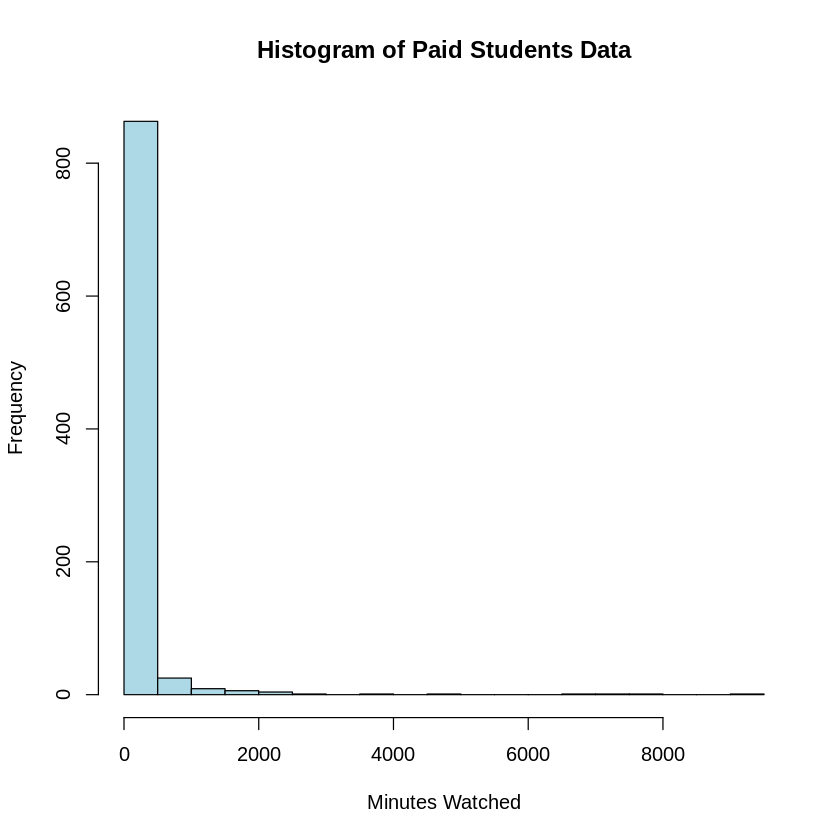

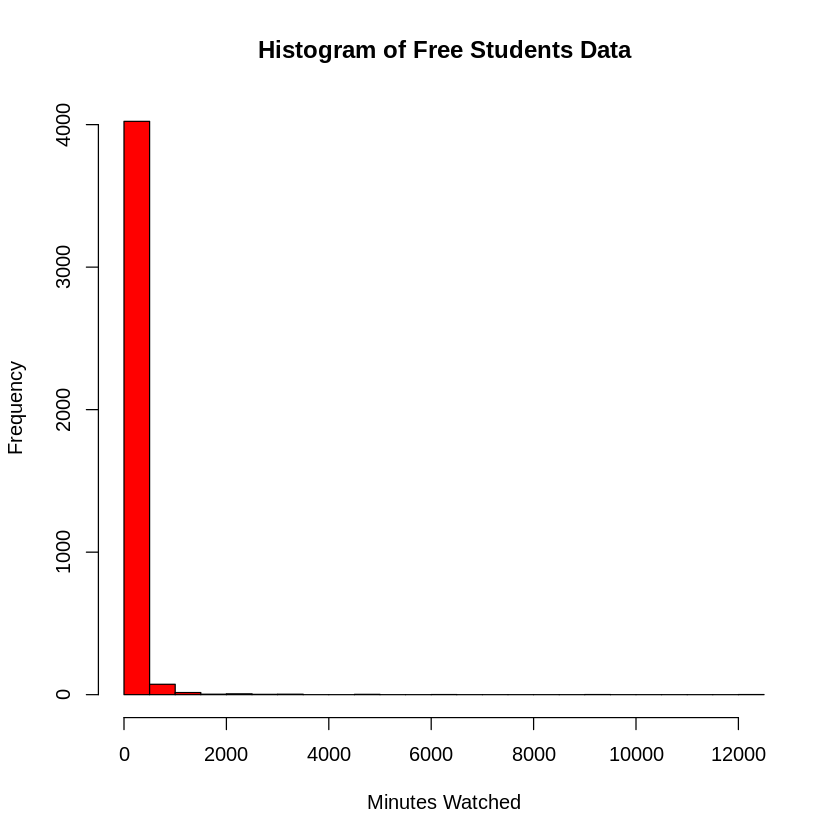

In [8]:
#plot histogram
hist(paid_students,
     breaks = 20, #number of bins
     main = "Histogram of Paid Students Data",
     xlab = "Minutes Watched",
     ylab = "Frequency",
     col = "lightblue")
hist(free_students,
     main = "Histogram of Free Students Data",
     breaks = 20, #number of bins
     xlab = "Minutes Watched",
     ylab = "Frequency",
     col = "red")

###Boxplot

    Both samples shows a very concentrated IQR

    Both samples presents outliers.
    Given their frequency, they may not be erased from the data. These extreme values may be informative.



**COMPARISON:**

    - The central data for the paid plan is bigger. We have a more present population of outliers in the free data


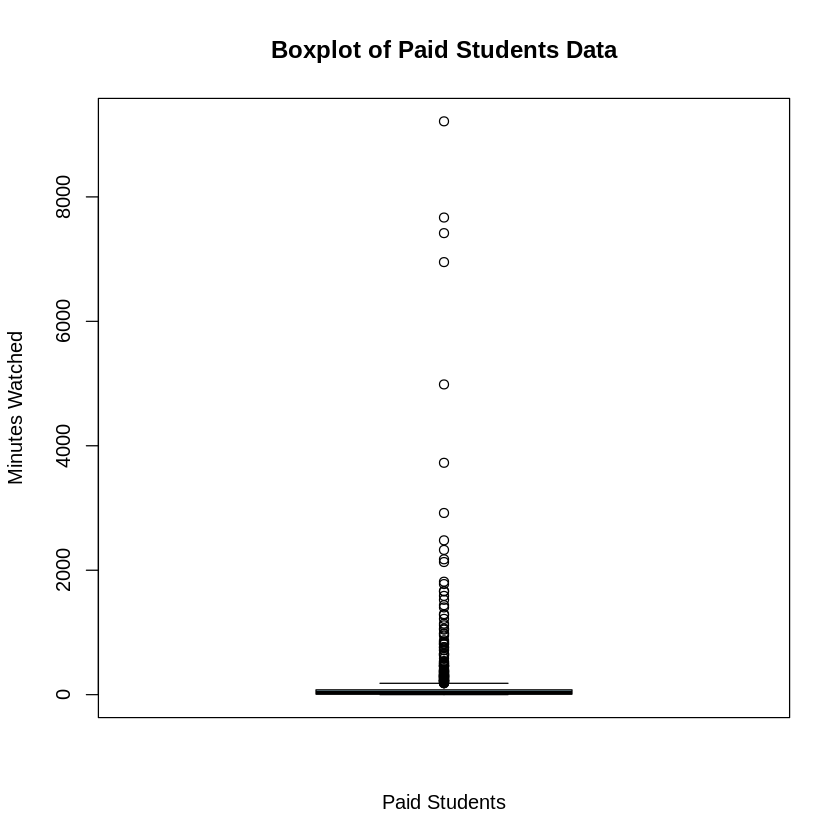

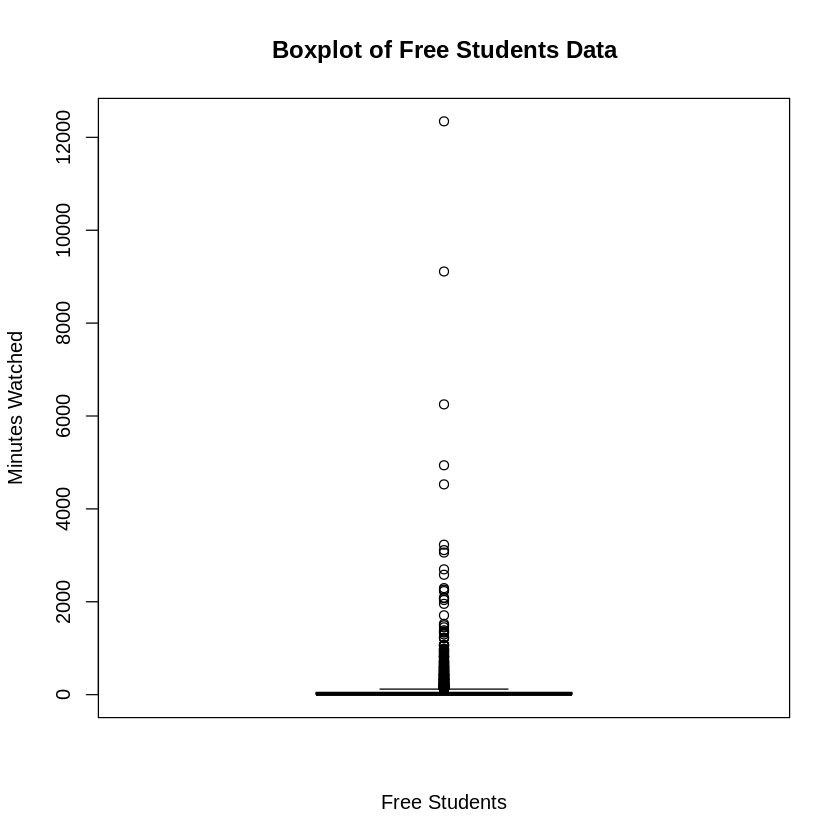

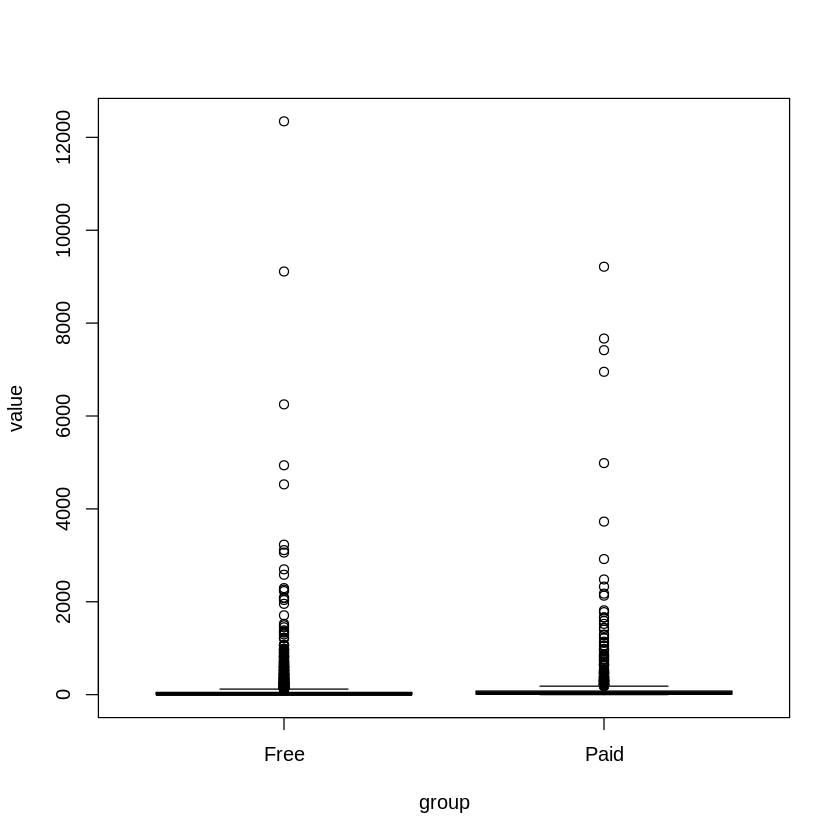

In [13]:
boxplot(paid_students,
        main = "Boxplot of Paid Students Data",
        xlab = "Paid Students",
        ylab = "Minutes Watched",
        col = "lightblue")
boxplot(free_students,
        main = "Boxplot of Free Students Data",
        xlab = "Free Students",
        ylab = "Minutes Watched",
        col = "red")

#comparison between both samples
df <- data.frame(
  group = c(rep('Paid', length(paid_students)), rep('Free', length(free_students))),
  value = c(paid_students, free_students))

boxplot(value ~ group, data = df, col = c("lightblue", "lightgreen"))

BUT, these graphics are not very informative because of the scale.

    Let's erase the outliers and print them again and compare the central data (There are some visible outliers and it may be the case that removing them we could see the data as normally distributed).



Z-score method:
  - identifies outliers by measuring how many standard deviations a data point is away from the mean. The htreshold is normally fixed at 2 or 3.

IQR method:
  - identifies outliers by how far a data point is from the IR from above and below

In [14]:
#Removing outliers based on the IQR method (and the Z-score method)

#Calculate quantiles and IQR
Q1 <- quantile(paid_students, 0.25)
Q3 <- quantile(paid_students, 0.75)
IQR <- Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound <- Q3 + 1.5 * IQR
lower_bound <- Q1 - 1.5 * IQR

# Remove outliers
paid_students_no_outliers <- paid_students[paid_students >= lower_bound & paid_students <= upper_bound]

#Calculate quantiles and IQR
Q1 <- quantile(free_students, 0.25)
Q3 <- quantile(free_students, 0.75)
IQR <- Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound <- Q3 + 1.5 * IQR
lower_bound <- Q1 - 1.5 * IQR

# Remove outliers
free_students_no_outliers <- free_students[free_students >= lower_bound & free_students <= upper_bound]


#Z-score method: Suitable for approximately normal distributions, but sensitive to skewness.
#IQR method: More robust for skewed distributions, as it relies on the median and IQR, which are less affected by extreme values.

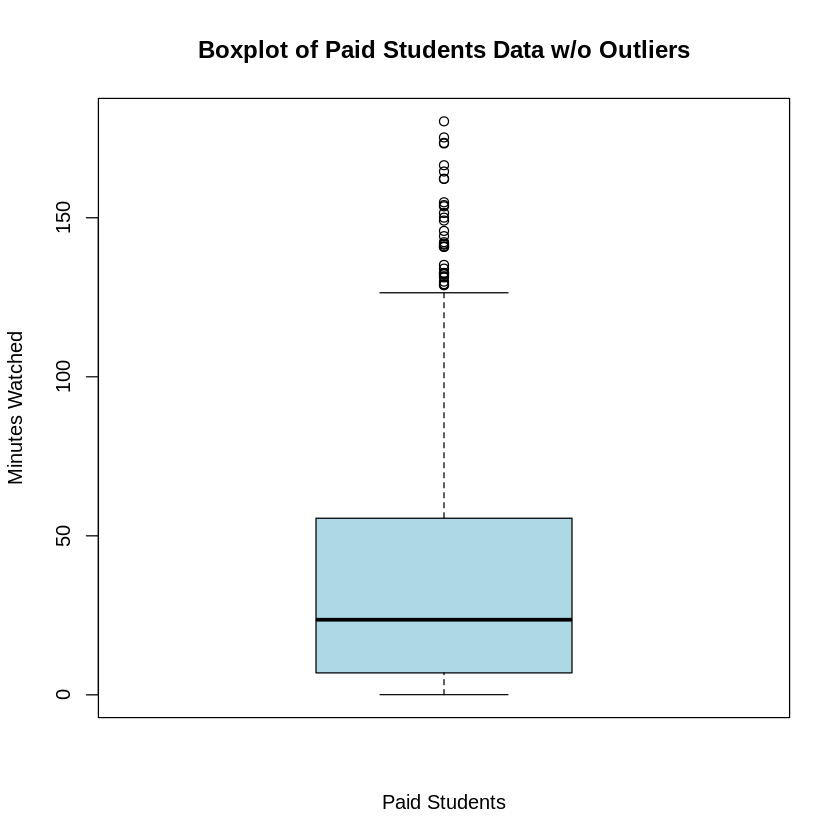

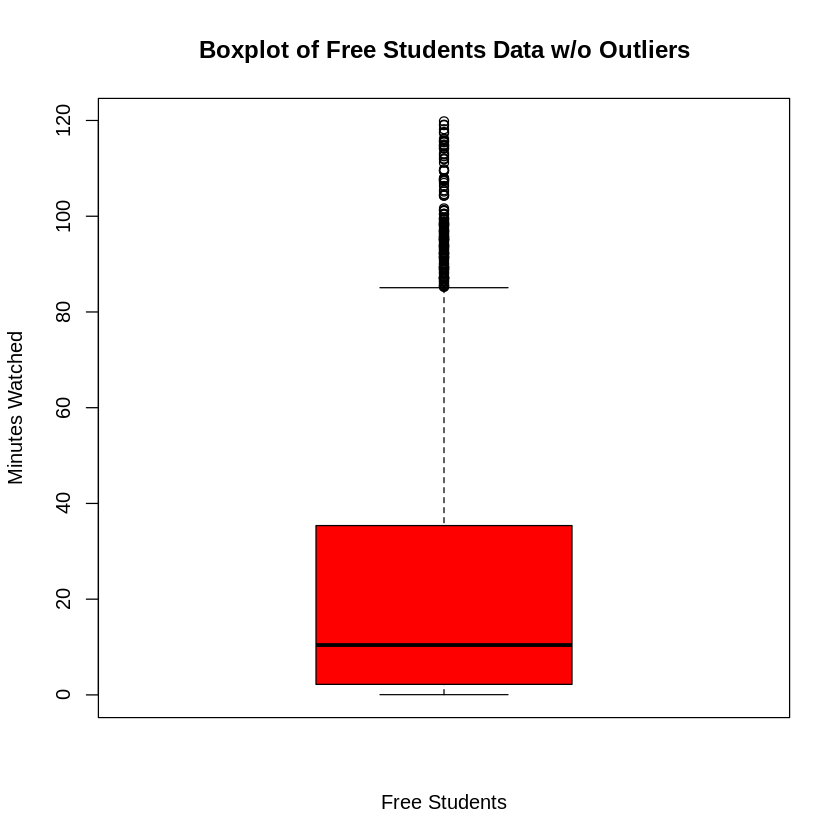

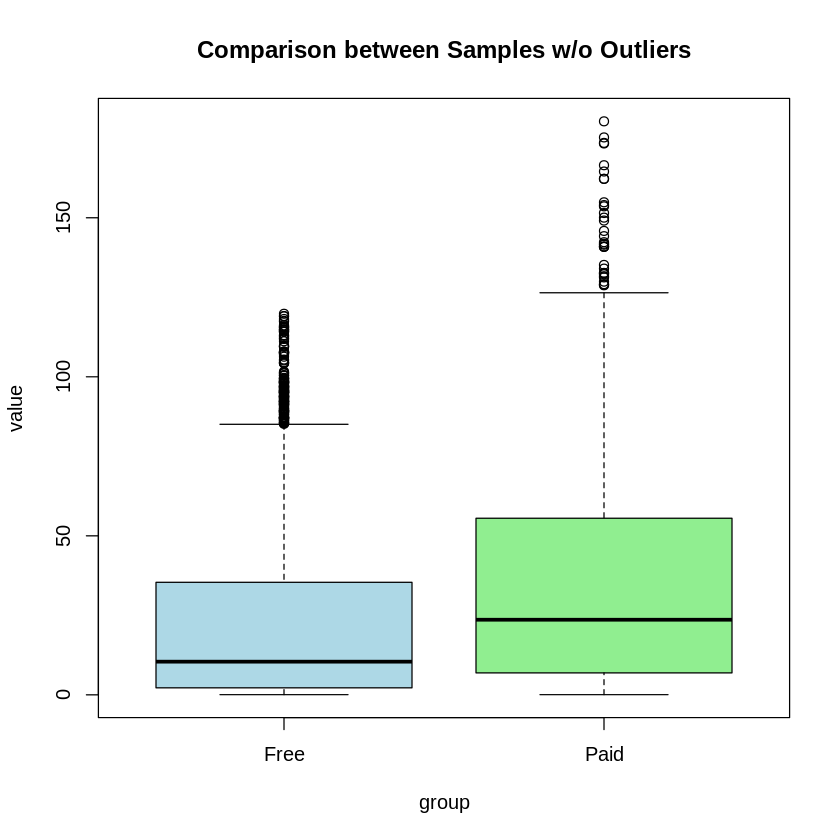

In [15]:

boxplot(paid_students_no_outliers,
        main = "Boxplot of Paid Students Data w/o Outliers",
        xlab = "Paid Students",
        ylab = "Minutes Watched",
        col = "lightblue")
boxplot(free_students_no_outliers,
        main = "Boxplot of Free Students Data w/o Outliers",
        xlab = "Free Students",
        ylab = "Minutes Watched",
        col = "red")

#comparison between both samples
df <- data.frame(
  group = c(rep('Paid', length(paid_students_no_outliers)), rep('Free', length(free_students_no_outliers))),
  value = c(paid_students_no_outliers, free_students_no_outliers))

boxplot(value ~ group, data = df, col = c("lightblue", "lightgreen"), main = 'Comparison between Samples w/o Outliers')

**Interpretation:**

  - the distribution of paid users is more concentrated around the central data --> this will be confirmed by the kurtosis of the distributions
  - the distributions of paid users is more spread out. The distribution of free users is concentrated around its peak and around its tail.
  - we can check that both distributions are right skewed: we have a little range below the Q1
  - pid user distribution has a higher median and less outliers


### ECDF (Experimental Cumulative Distribution Function)

When we are trying to see the fit with some theoretical distribution, we compare the ECDF of the empirical distribution with the CDF of the theoretical distribution.


  - **CDF** represents cumulative probabilities:

    The CDF gives you the probability that a random variable will take a value less than or equal to a given value. This is directly comparable to the empirical cumulative distribution function (ECDF, which is an empirical estimate of the data) of the data, which represents the proportion of data points less than or equal to each observed value; the ECDF is a non-parametric estimate of the true underlying CDF of your data.

We can also compare out histogram with the PDF of the theoretical distribution like a firt inspection







- We will do it taking into consideration only the central data (no outliers) because that's the part of the sample that would tell us the tendency in each of the groups. This is the analysis we should compare from year to year to build up a strategy.

- Nevertheless, the extreme values may tell us valuable information because in the free subscription plan, the above outliers are the part of the sample where we should focus our attention to convert them to paid subscriptors and the part of the paid subscriptor that are below outliers are the ones that are probably disentangling from the project and thus,w e should focus our attention to keep them in our platform

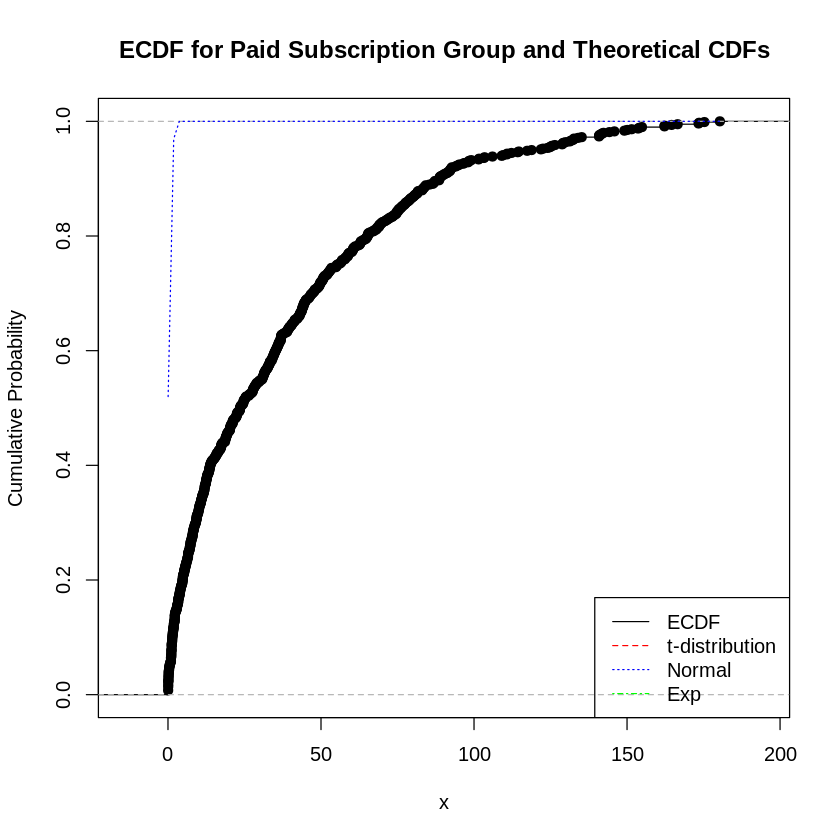

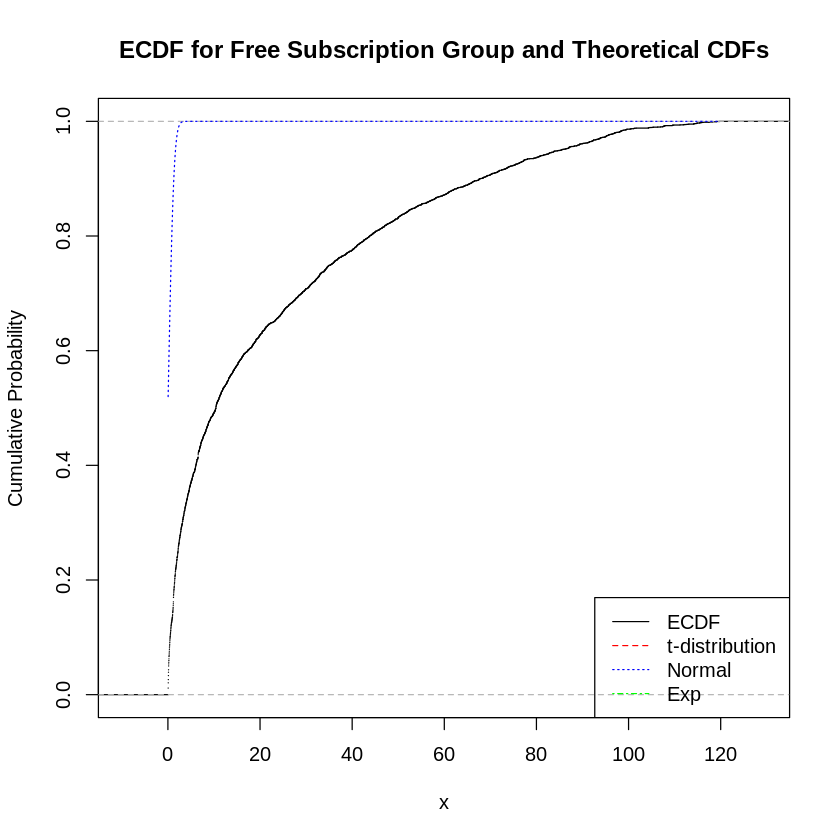

In [36]:

ecdf_paid <- ecdf(paid_students_no_outliers)
ecdf_free <- ecdf(free_students_no_outliers)

# Define a x-grid
x_paid_no_outliers <- seq(min(paid_students_no_outliers), max(paid_students_no_outliers), length.out = 100)
x_free_no_outliers <- seq(min(free_students_no_outliers), max(free_students_no_outliers), length.out = 1000) #more data points, the range is bigger


# CDF values for t-distribution, normal and exponential distribution
# ATTENTION! we have a problem: parameters are not optimally estimated and hard-coded!!!
cdf_t_paid <- pt(x_paid_no_outliers, df = length(paid_students_no_outliers) - 1)
cdf_normal_paid <- pnorm(x_paid_no_outliers)
cdf_exp_paid <- pexp(x_paid_no_outliers, rate = 2)

cdf_t_free <- pt(x_free_no_outliers, df = length(free_students_no_outliers) - 1)
cdf_normal_free <- pnorm(x_free_no_outliers)
cdf_exp_free <- pexp(x_free_no_outliers, rate = 2)


plot(ecdf_paid, main = "ECDF for Paid Subscription Group and Theoretical CDFs",
     xlab = "x", ylab = "Cumulative Probability")
#lines(x_paid_no_outliers, cdf_t_paid, col = "red", lty = 2)  # Add t-distribution CDF
lines(x_paid_no_outliers, cdf_normal_paid, col = "blue", lty = 3) # Add normal distribution CDF
#lines (x_paid_no_outliers, cdf_exp_paid, col = "green", lty = 4) #Add exponential distribution CDF

legend("bottomright", legend = c("ECDF", "t-distribution", "Normal", "Exp"),
       col = c("black", "red", "blue", "green"), lty = c(1, 2, 3, 4))

plot(ecdf_free, main = "ECDF for Free Subscription Group and Theoretical CDFs",
     xlab = "x", ylab = "Cumulative Probability")
#lines(x_free_no_outliers, cdf_t_free, col = "red", lty = 2)  # Add t-distribution CDF
lines(x_free_no_outliers, cdf_normal_free, col = "blue", lty = 3) # Add normal distribution CDF
#lines (x_free_no_outliers, cdf_exp_free, col = "green", lty = 4) #Add exponential distribution CDF
legend("bottomright", legend = c("ECDF", "t-distribution", "Normal", "Exp"),
       col = c("black", "red", "blue", "green"), lty = c(1, 2, 3, 4))

TODO: WHAT RESULTS WOULD GIVE US TO USE A METHOD FOR THE DETECTION OF OUTLIERS CENTERED AROUND THE MEAN AND NOT THE MEDIAN. IT IS NORMALLY NOT RECOMMENDED FOR VERY SKEWED DATA

**wHAT WOULD WE LIKE TO KNOW ABOUT THE BAHAVIOUR OF EXTREME VALUES?**
  - I would like to know whats the probability of a data point being an outlier.
        I should have to plot the median



In [65]:
Med_Paid <- summary(paid_students)["Median"]
Med_Free <- summary(free_students)["Median"]

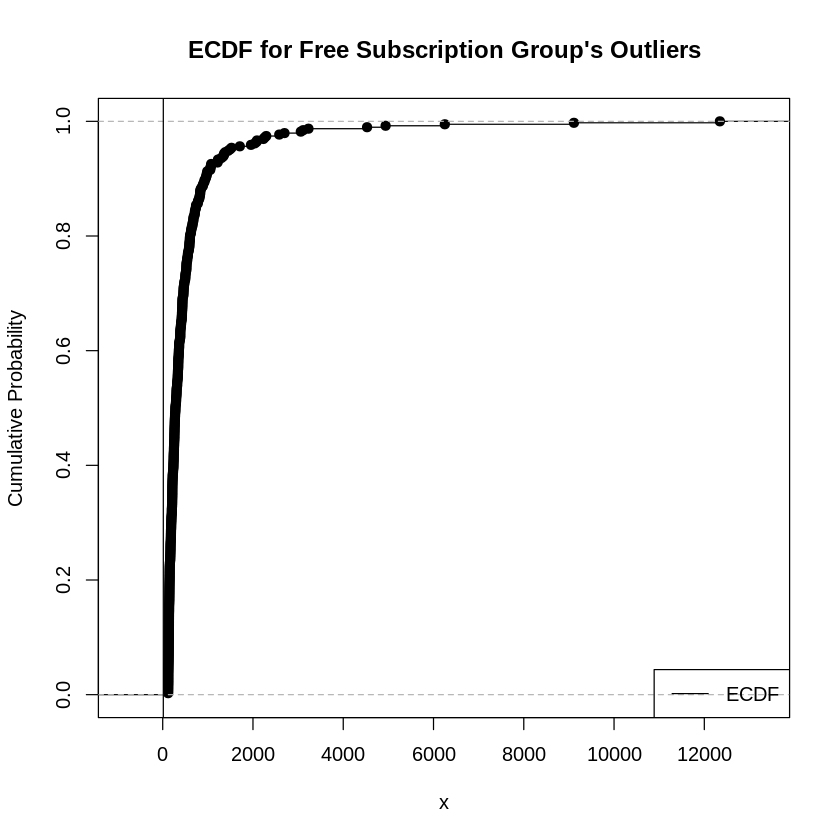

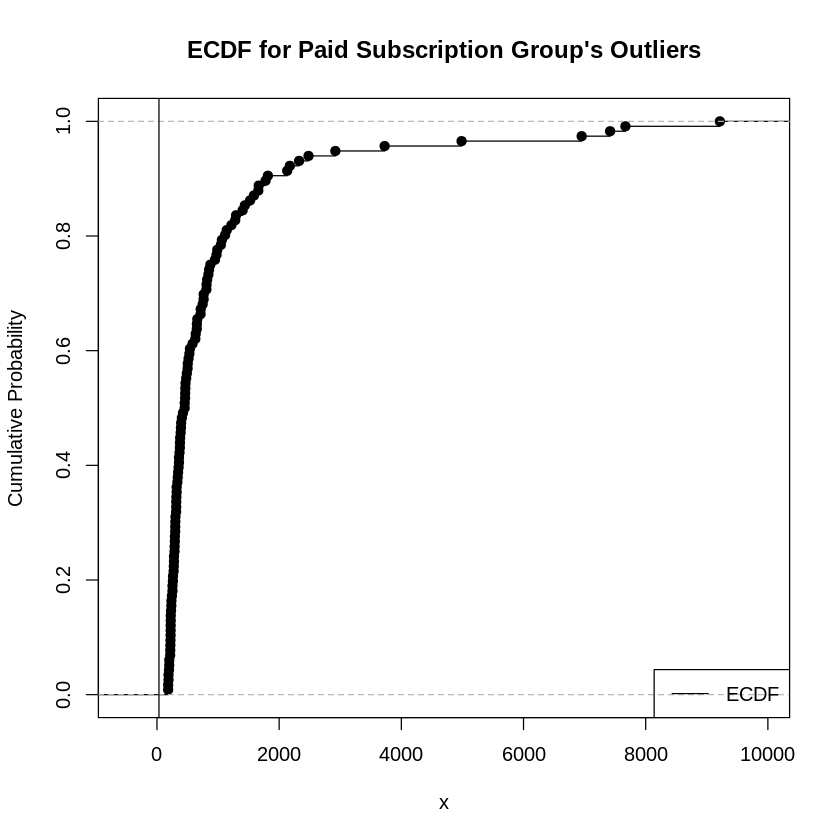

In [66]:

outliers_paid <- setdiff(paid_students, paid_students_no_outliers)
outliers_free <- setdiff(free_students, free_students_no_outliers)

ecdf_paid_outliers <- ecdf(outliers_paid)
ecdf_free_outliers <- ecdf(outliers_free)

plot(ecdf_free_outliers, main = "ECDF for Free Subscription Group's Outliers",
     xlab = "x", ylab = "Cumulative Probability")
legend("bottomright", legend = c("ECDF"),
       col = c("black"), lty = c(1))
abline(v = Med_Free)

plot(ecdf_paid_outliers, main = "ECDF for Paid Subscription Group's Outliers",
     xlab = "x", ylab = "Cumulative Probability")
legend("bottomright", legend = c("ECDF"),
       col = c("black"), lty = c(1))
abline(v = Med_Paid)

In [75]:
# probability that the time spent by a user in the paid subscription is below or equal to the Median
p_paid <- ecdf_paid(Med_Paid)
p_free <- ecdf_free(Med_Free)
p_paid
p_free

[1] 0.5726817

[1] 0.5534423

### Q-Q Plots:

- The Q- Q plots are used to compare the quantiles of two distributions: our empirical one and a theoretical one that we choose to compare with.

- It can also be used for assessing if two samples belong to the same distribution.

- This may tell us where the empirical data is better approximated by some distributions to be able to perform a mixture approximation.

- The problem of the comparison is that we have to choose for a specific set of parameters of the parametrized theoretical distributions

*What are we looking for?*

      Systematic deviations from the line indicate that your data does not follow the theoretical distribution. Here are some common patterns and their interpretations:
        Curving Upwards at the Ends (Heavier Tails): This means your data has more extreme values in the tails than the theoretical distribution. Your distribution has higher kurtosis.
        Curving Downwards at the Ends (Lighter Tails): This means your data has fewer extreme values in the tails compared to the theoretical distribution. Your distribution has lower kurtosis.
        S-shaped Deviations: This can indicate skewness or other complex departures from the theoretical distribution. For example, if the points form an "S" shape starting below the line and ending above it, your data might be right-skewed.
        Horizontal or Vertical Clusters of Points: These can indicate the presence of discrete values or gaps in your data.

**Theoretical Distribution: Normal**


It is clear that the distributions are right skewed and has heavier tails (?) than the normal distribution.

In [76]:
#estimating parameters

# Using MoM:
#paid_mean_mom <- mean(paid_students)
#paid_sd_mom <- sd(paid_students)

# Using MLE:
paid_mean <- mean(paid_students)
paid_sd <- sd(paid_students) * sqrt((length(paid_students) - 1) / length(paid_students))

free_mean <- mean(free_students)
free_sd <- sd(free_students) * sqrt((length(free_students) - 1) / length(free_students))

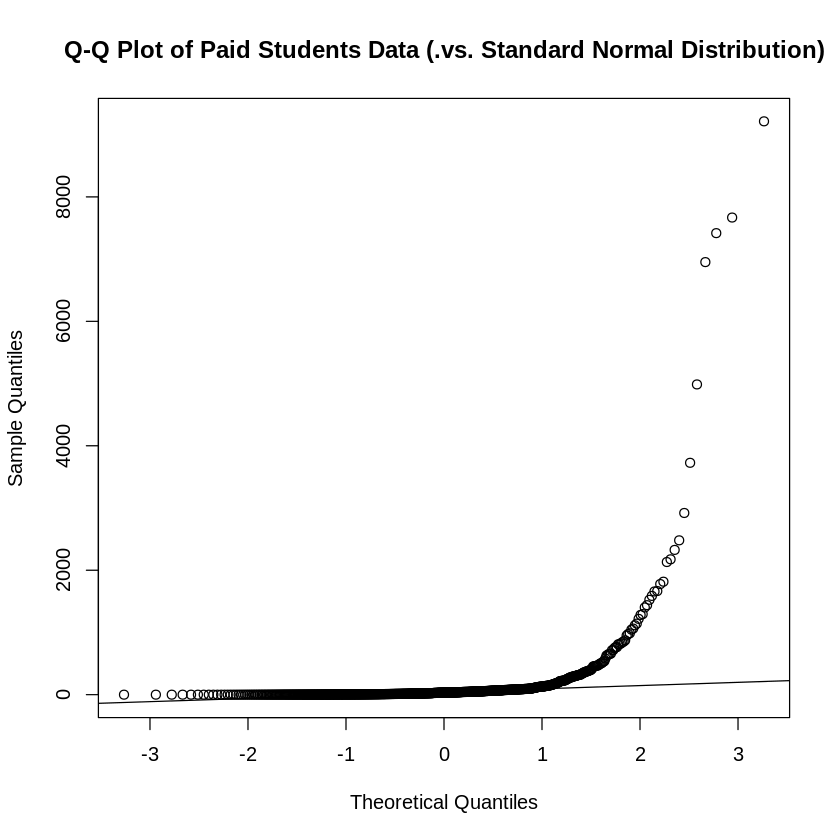

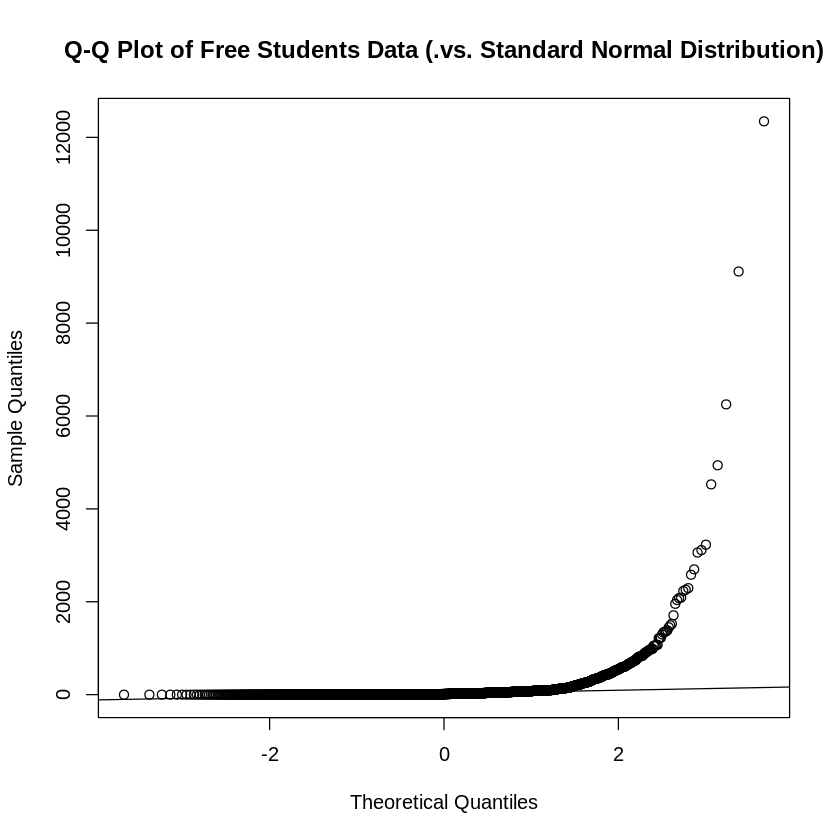

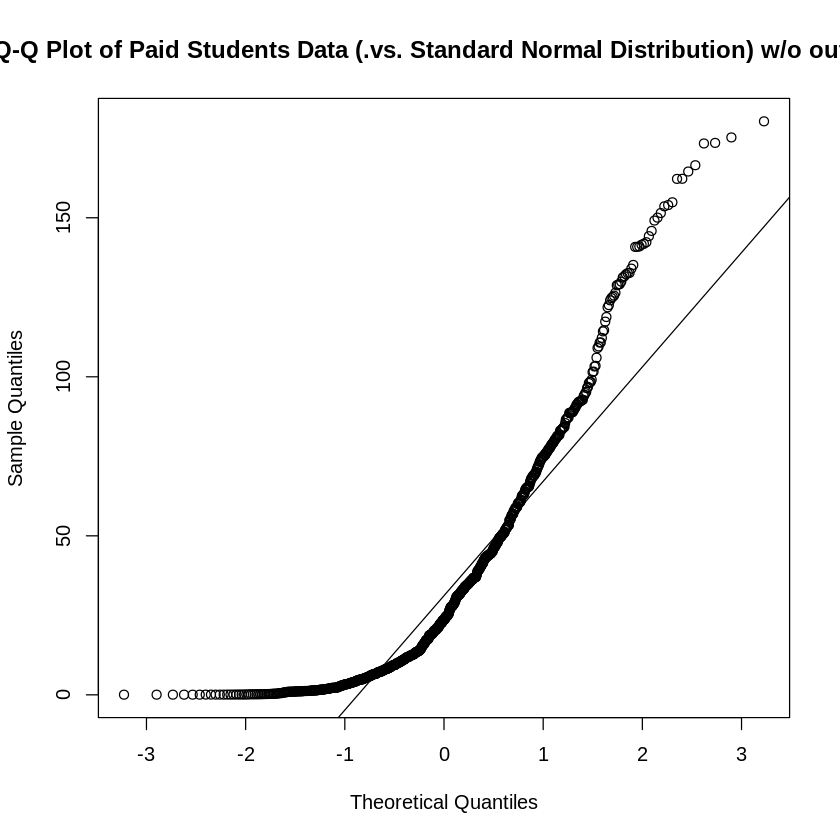

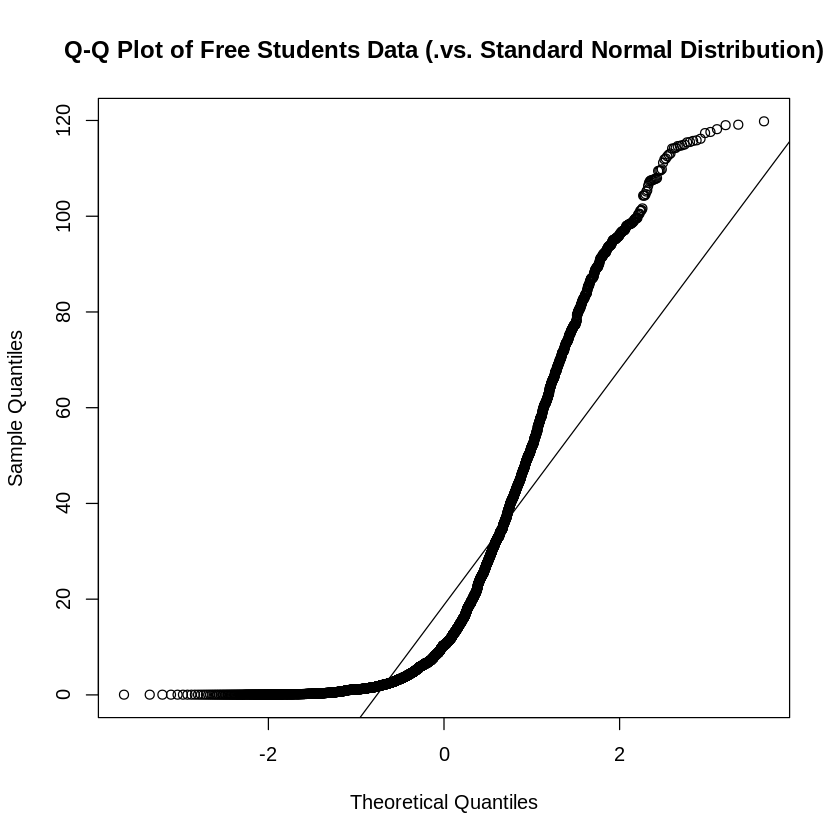

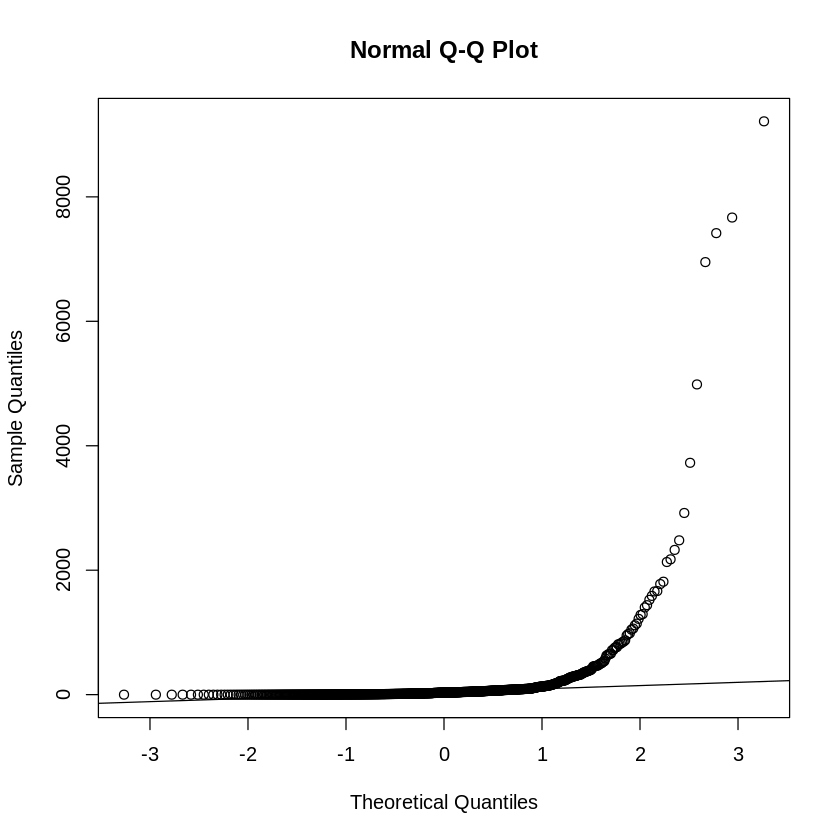

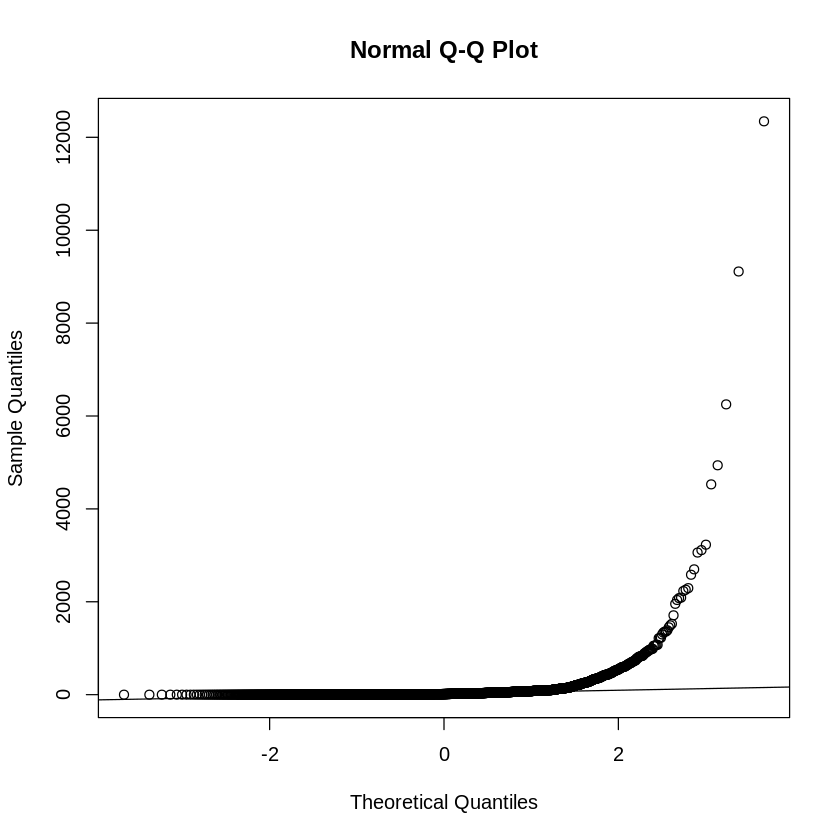

In [79]:
#calculating quantiles
#sort_paid_students = sort(paid_students)
#norm_quant_paid = qnorm(ppoints(length(paid_students)), mean = paid_mean, sd = paid_sd)
#plot(norm_quant_paid, sort_paid_students)
#abline(0, 1)

#sort_free_students = sort(free_students)
#norm_quant_free = qnorm(ppoints(length(free_students)), mean = free_mean, sd = free_sd)
#plot(norm_quant_free, sort_free_students)
#abline(0, 1)

#comparign with a (standard) normal distribution for all the empirical distribution
qqnorm(paid_students, #directly sorting
       main = "Q-Q Plot of Paid Students Data (.vs. Standard Normal Distribution)",
       xlab = "Theoretical Quantiles",
       ylab = "Sample Quantiles")
qqline(paid_students) #calculates first and third
#quartiles of the data and draws a line through the points on the plot
#that correspond to these quartiles

qqnorm(free_students, #comparing to a normal distribution
       main = "Q-Q Plot of Free Students Data (.vs. Standard Normal Distribution)",
       xlab = "Theoretical Quantiles",
       ylab = "Sample Quantiles")
qqline(free_students)

#comparign with a (standard) normal distribution for all the empirical distribution exluding outliers
qqnorm(paid_students_no_outliers,
       main = "Q-Q Plot of Paid Students Data (.vs. Standard Normal Distribution) w/o outliers",
       xlab = "Theoretical Quantiles",
       ylab = "Sample Quantiles")
qqline(paid_students_no_outliers)

qqnorm(free_students_no_outliers,
       main = "Q-Q Plot of Free Students Data (.vs. Standard Normal Distribution)",
       xlab = "Theoretical Quantiles",
       ylab = "Sample Quantiles")
qqline(free_students_no_outliers)

#standarizing the data
qqnorm(paid_students - paid_mean/ paid_sd)
qqline(paid_students - paid_mean/ paid_sd)
qqnorm(free_students - free_mean/ free_sd)
qqline(free_students - free_mean/ free_sd)



TODO: the last approach tries to compare the empirical distribution with a non standard normal distribution

Theoretical Distribution: Pareto

  **They can't be modeled by a Pareto distribution because it is undefined at 0**

In [80]:
# we need to first know what are the shape and scale values for comparing to a Pareto distribution
#METHOD: MAXIMUM LIKELIHOOD ESTIMATION (MLE)
if(!require("VGAM")) install.packages("VGAM")
library(VGAM)


fit_paid <- vglm(paid_students ~ 1, paretoII, loc=0)
fit_free <- vglm(free_students ~ 1, paretoII, loc=0)

#PARAMETERS:
#loc = 0 assumes data is strictly positive
#the fitting is for a Pareto distribution of type II

shape_paid <- coef(fit_paid)[1]
scale_paid <- exp(coef(fit_paid)[2])
shape_free <- coef(fit_free)[1]
scale_free <- exp(coef(fit_free)[2])

#METHOD OF MOMENTS --> LESS RELIABLE, PARTICULARLY FOR SMALLER SAMPLES OR HEAVILY SKEWED DATA
# Calculate sample mean and variance
#sample_mean <- mean(my_data)
#sample_variance <- var(my_data)
# Estimate shape and scale using MoM
#shape <- (sample_mean^2) / (sample_variance - sample_mean^2) + 2 #or 1 + sqrt(1 + var(x)/((mean(x))^2))
#scale <- sample_mean * (shape-1) / shape

Loading required package: VGAM

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘VGAM’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: stats4

Loading required package: splines



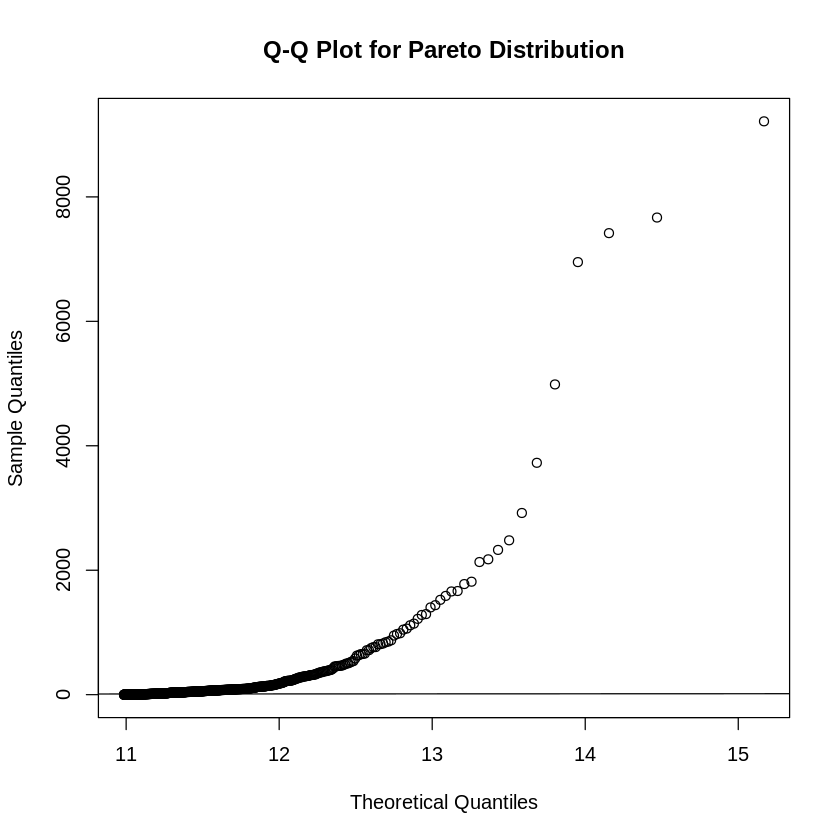

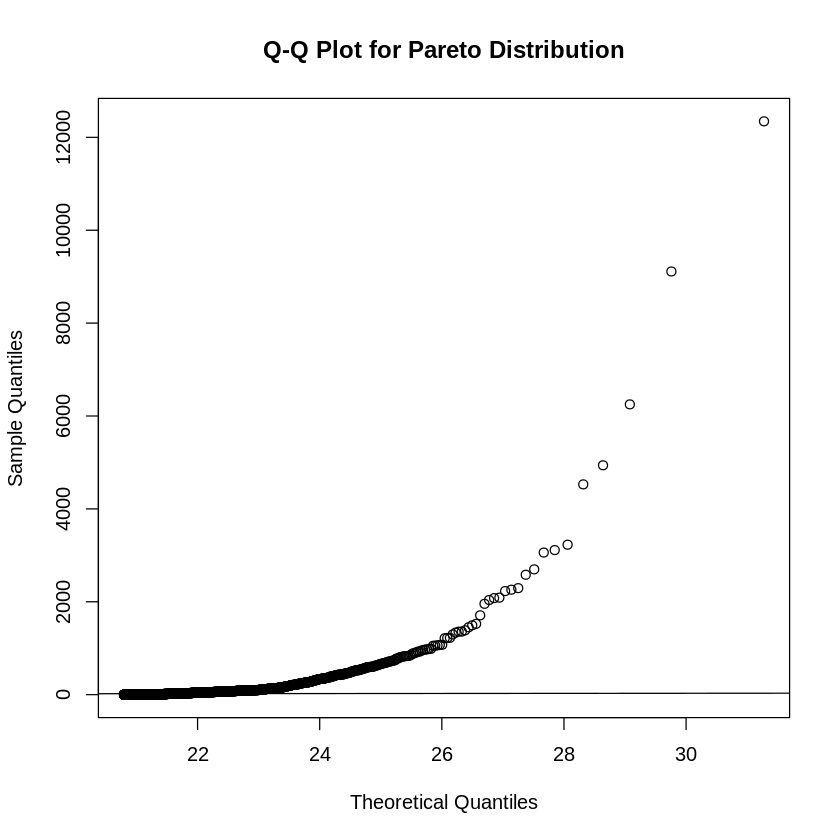

In [27]:
pareto_quant_paid <- qpareto(ppoints(length(paid_students)), shape = shape_paid + 20, scale = scale_paid + 10)
pareto_quant_free <- qpareto(ppoints(length(free_students)), shape = shape_free + 20, scale = scale_free + 20)
sort_paid_students = sort(paid_students)
sort_free_students = sort(free_students)
plot(pareto_quant_paid, sort_paid_students,
     main = "Q-Q Plot for Pareto Distribution",
     xlab = "Theoretical Quantiles",
     ylab = "Sample Quantiles")

abline(0, 1)

plot(pareto_quant_free, sort_free_students,
     main = "Q-Q Plot for Pareto Distribution",
     xlab = "Theoretical Quantiles",
     ylab = "Sample Quantiles")

abline(0, 1)

Theoretical Distibution: t-Student

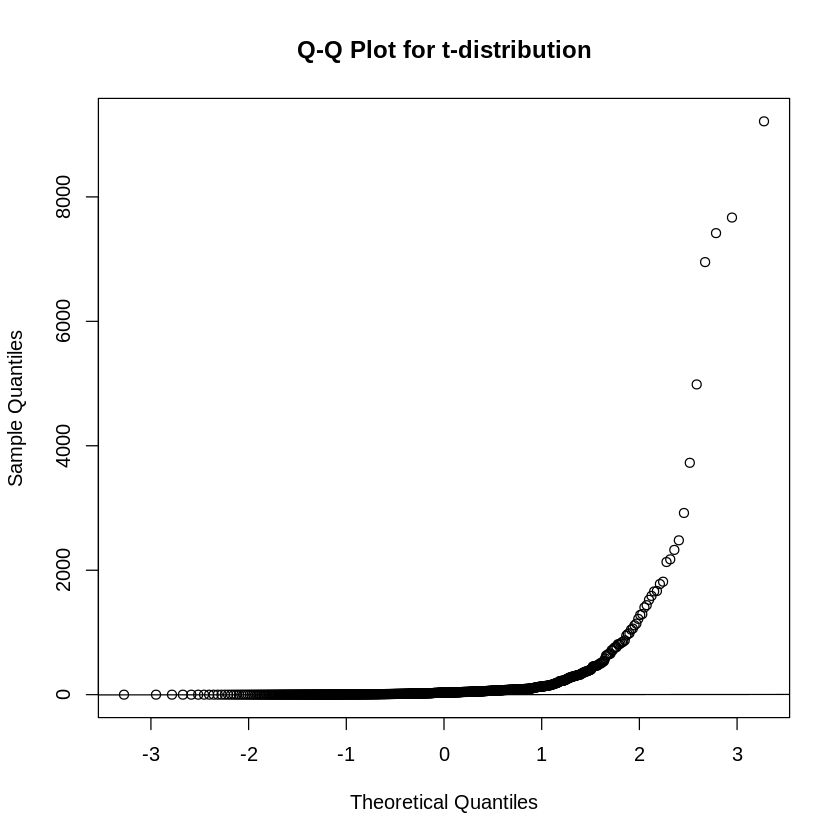

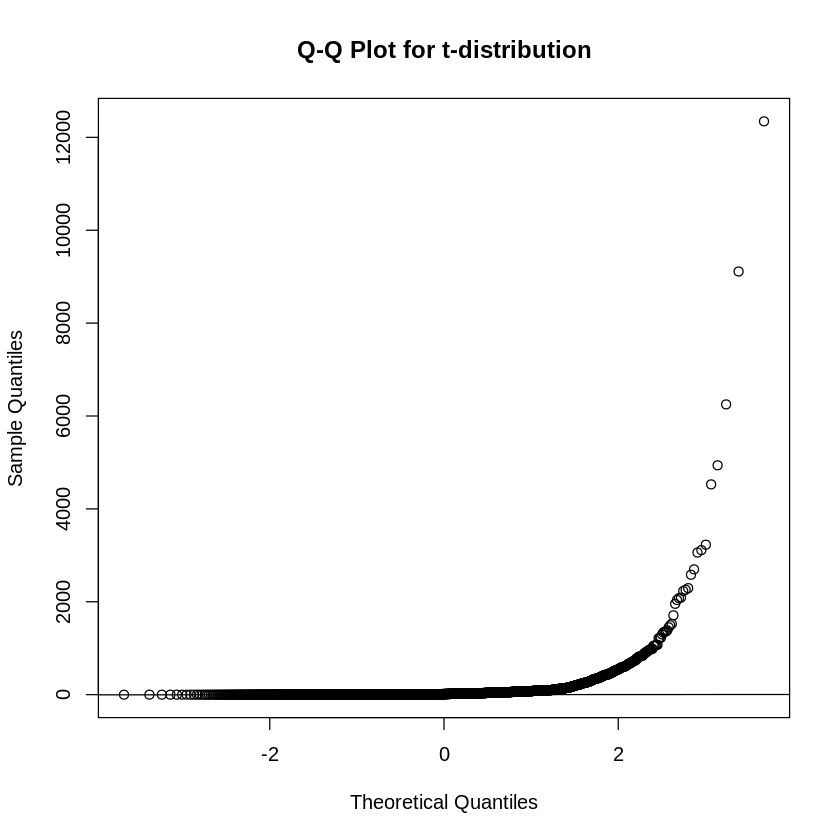

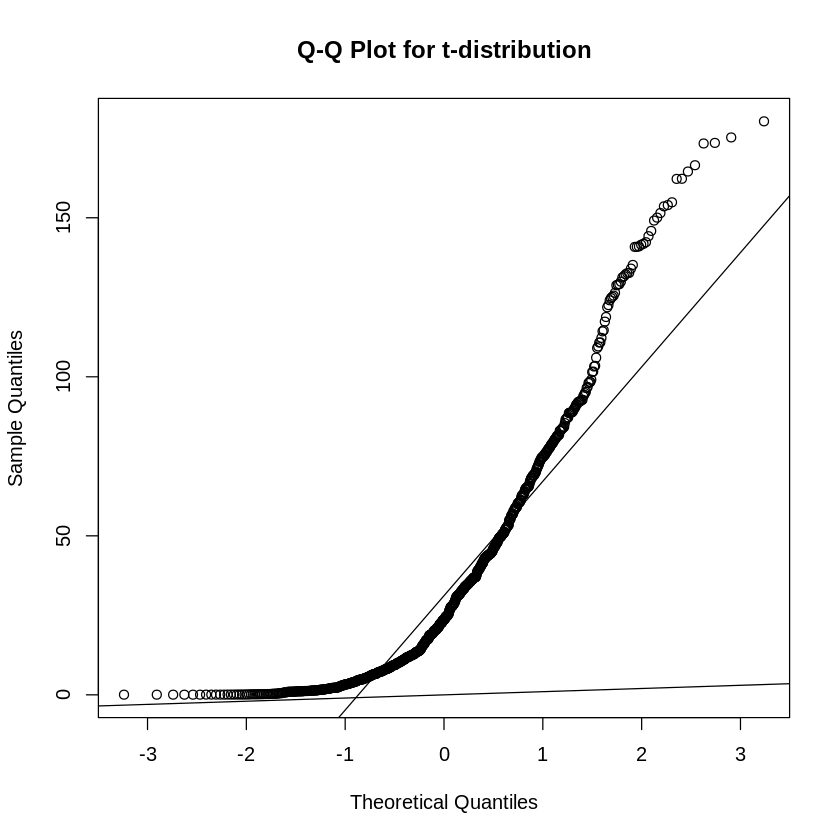

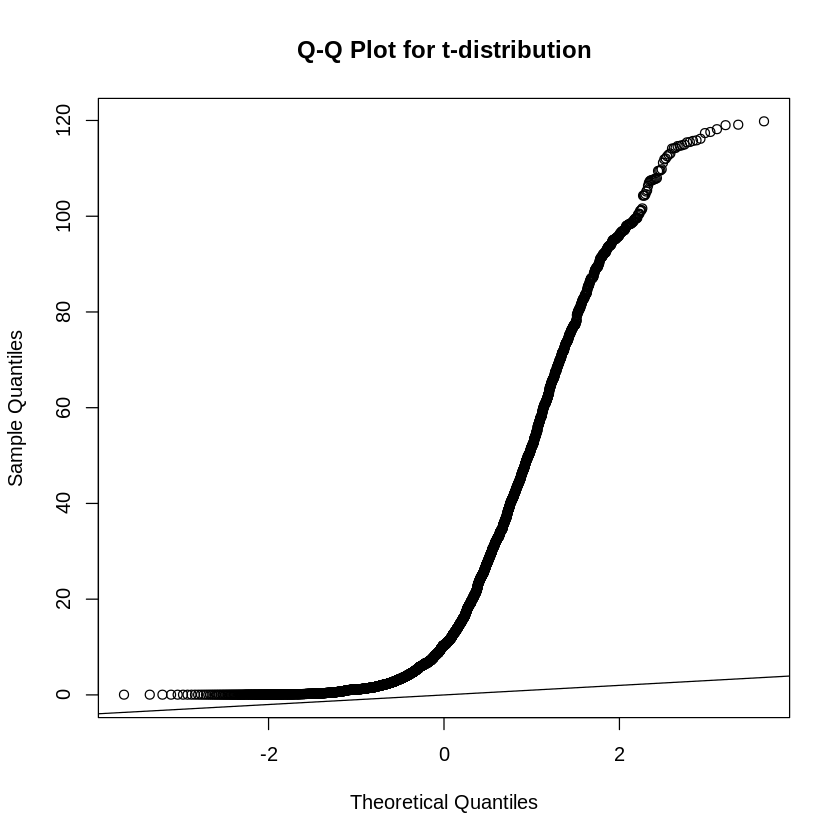

In [85]:
t_quant_paid <- qt(ppoints(length(paid_students)), df = length(paid_students) - 1)
sort_paid_students = sort(paid_students)
plot(t_quant_paid, sort_paid_students,
     main = "Q-Q Plot for t-distribution",
     xlab = "Theoretical Quantiles",
     ylab = "Sample Quantiles")

abline(0, 1)
#The qt() function in R returns the quantile (or the value on the x-axis) below
#which a given proportion of the probability density of the t-distribution lies.
#When you use qt(0.05, df), you're essentially asking for the t-value such that
#5% of the distribution lies to the left of it (in the left tail).

t_quant_free <- qt(ppoints(length(free_students)), df = length(free_students) - 1)
sort_free_students = sort(free_students)
plot(t_quant_free, sort_free_students,
     main = "Q-Q Plot for t-distribution",
     xlab = "Theoretical Quantiles",
     ylab = "Sample Quantiles")

abline(0, 1)

t_quant_paid_wo <- qt(ppoints(length(paid_students_no_outliers)), df = length(paid_students_no_outliers) - 1)
sort_paid_students_wo = sort(paid_students_no_outliers)
plot(t_quant_paid_wo, sort_paid_students_wo,
     main = "Q-Q Plot for t-distribution",
     xlab = "Theoretical Quantiles",
     ylab = "Sample Quantiles")

abline(0, 1)
qqline(paid_students_no_outliers)

t_quant_free_wo <- qt(ppoints(length(free_students_no_outliers)), df = length(free_students_no_outliers) - 1)
sort_free_students_wo = sort(free_students_no_outliers)
plot(t_quant_free_wo, sort_free_students_wo,
     main = "Q-Q Plot for t-distribution",
     xlab = "Theoretical Quantiles",
     ylab = "Sample Quantiles")

abline(0, 1)

Theoretical Distribution: Exponential

In [ ]:
#how to assess the rate of the exponential distribution?

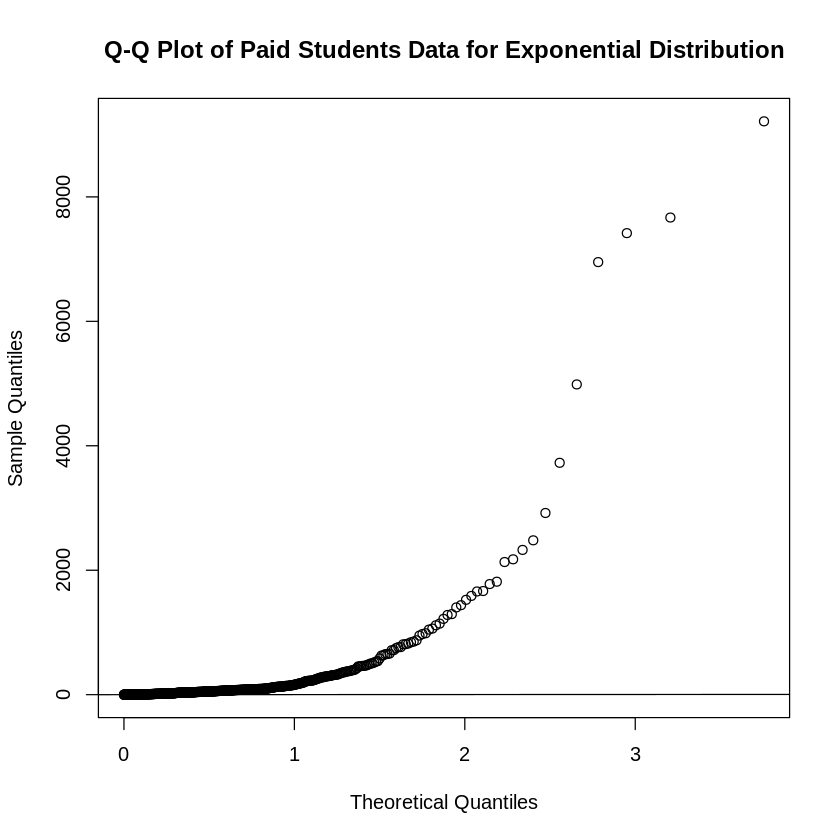

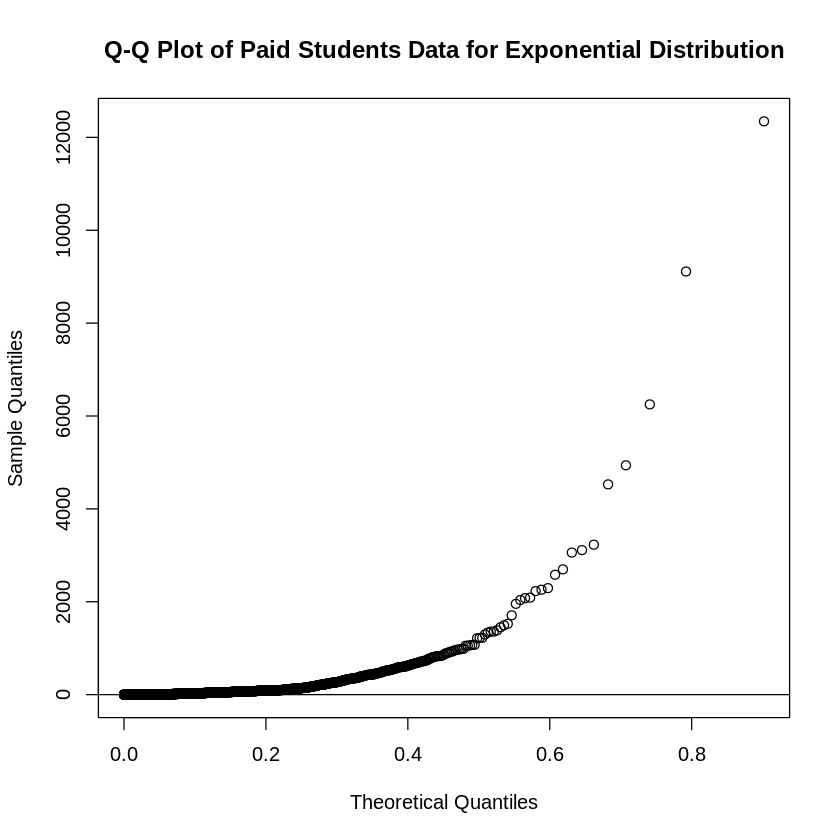

In [82]:
#comparign with an exponential distribution
exp_quant_paid <- qexp(ppoints(length(paid_students)), rate = 2)
#ppoints: generates a sequence of probabilites for calculating quantiles.
#Equally spaced probabilities between 0 and 1.
#qexp is the quantile function of the exponential distribution. Inputs probabilities and outputs quantiles
sort_paid_students <- sort(paid_students)

plot(exp_quant_paid, sort_paid_students,
       main = "Q-Q Plot of Paid Students Data for Exponential Distribution",
       xlab = "Theoretical Quantiles",
       ylab = "Sample Quantiles")
#qqline(paid_students)
abline(0, 1)

exp_quant_free <- qexp(ppoints(length(free_students)), rate = 10)
sort_free_students <- sort(free_students)

plot(exp_quant_free, sort_free_students,
       main = "Q-Q Plot of Paid Students Data for Exponential Distribution",
       xlab = "Theoretical Quantiles",
       ylab = "Sample Quantiles")
#qqline(free_students)
abline(0, 1)



In summary, it seems that the normal and t distribution are the best ones fitting the data. It could be approximated especially for the center data.

Lets now use a QQ plot for assessing if both samples comes from the same distribution --> **we could say that with no outliers, both samples may not come from the same distribution**



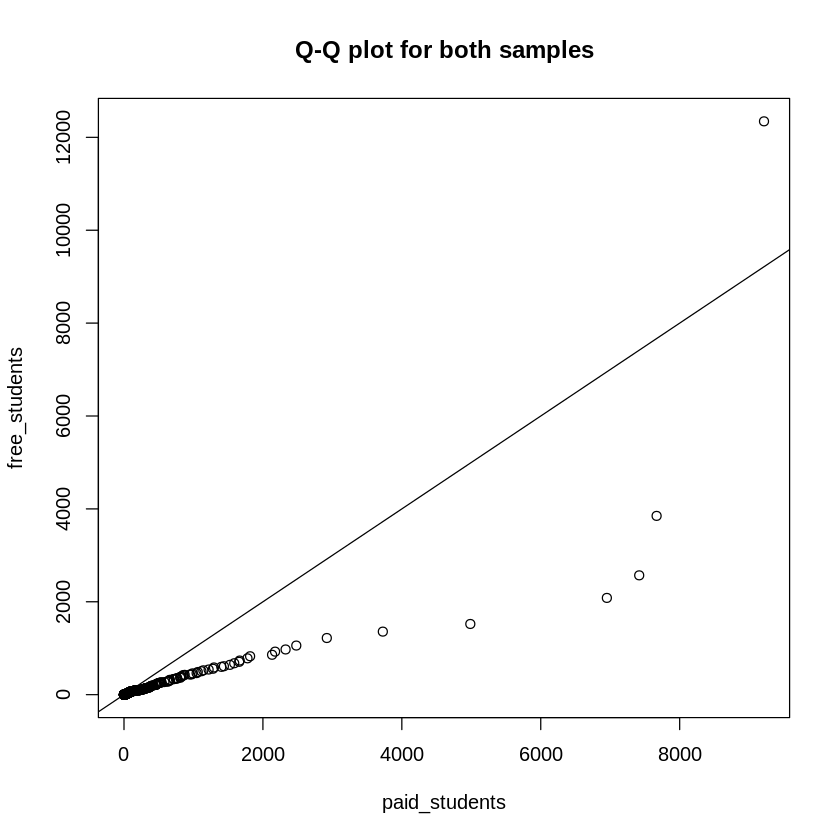

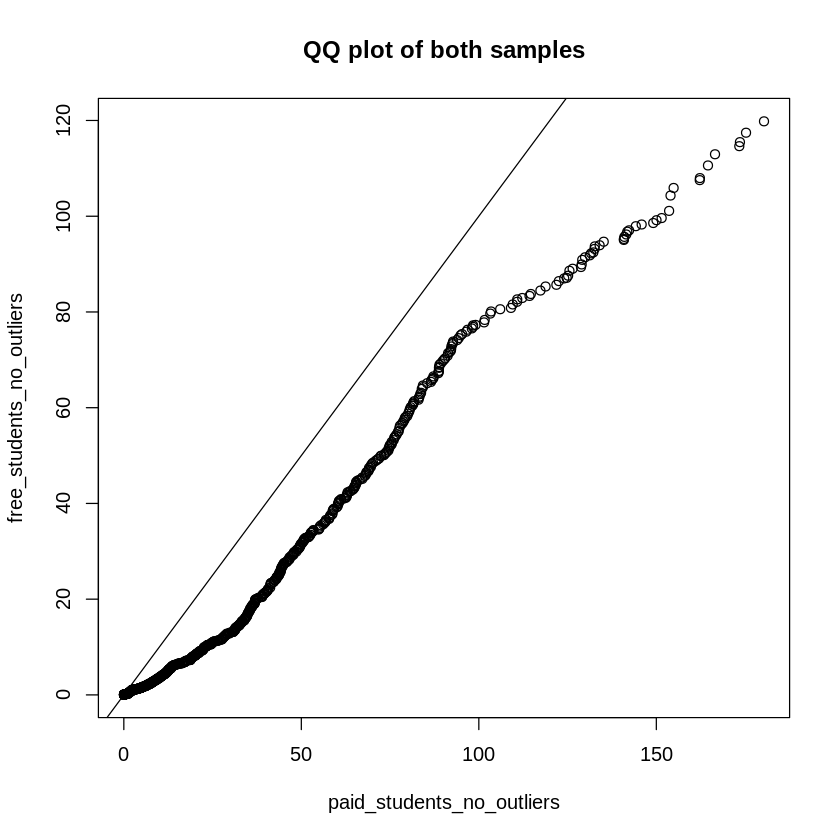

In [88]:
qqplot(paid_students, free_students,
       main = "Q-Q plot for both samples")
abline(0, 1)
qqplot(paid_students_no_outliers, free_students_no_outliers,
       main = "QQ plot of both samples")
abline(0, 1)

In [89]:
#install.packages("car")
#library(car)

2) DESCRIPTIVE STATISTICS

  Lets calculate MEAN, MEDIAN, MODE, STANDARD DEVIATION/VARIANCE, SKEWNESS, KURTOSIS
      
      SKEWNESS: is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In simpler terms, skewness tells you the direction and degree to which a distribution's tail is longer or fatter on one side compared to the other.
            The skewness in the paid students is slightly shifted to the right as compared to the one found in the free students data.
            The datasets are not symmetric. They exhibit a long tail to the right
      KURTOSIS: Kurtosis quantifies the extent to which the tails of the distribution differ from the tails of a normal distributions. Also, reflect the sharpness or flatness of the peak of a distribution
        Kurtosis: how much of the data is concentrated in the tails as opposed to the center of the distribution.A normal distribution has a kurtosis of 3.
        - Leptokurtic: distribution with kurtosis freater than 3 = heavier tails and sharper peak than normal distribution --> more extreme outliers
        - Platykurtic: kurtosis less than 3 = lighter tails and a flatter peak --> fewer extreme values
        - Mesokurtic: kurtosis is 3



In [90]:
print("Summary of paid students")
summary(paid_students)
#print(paste('Desviación estandar', sd(paid_students))) #sprintf()
#var(paid_students)
#range(paid_students)
#IQR(paid_students)

print("Summary of free students")
summary(free_students)


[1] "Summary of paid students"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.05    8.34   32.78  153.41   78.08 9214.13 

[1] "Summary of free students"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.050     2.622    13.350    71.515    49.660 12344.500 

On average, paid subscriptors spend more time but the minimum time spent is the same _> we need to reengage these students

The maximum time on the free subscriptors is bigger-> we need to convice these students to pass to a paid subscription

In [93]:
if (!require ("psych")) install.packages("psych")
library(psych)

Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:VGAM’:

    fisherz, logistic, logit




In [94]:
describe(paid_students)
describe(paid_students_no_outliers)

describe(free_students)
describe(free_students_no_outliers)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,914,153.4087,616.0111,32.785,47.33361,41.31265,0.05,9214.13,9214.08,9.928905,116.6623,20.37584


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,798,36.49758,37.68836,23.61,30.44234,29.73354,0.05,180.33,180.28,1.357178,1.489418,1.334154


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,4130,71.51457,335.2537,13.35,25.31823,18.68076,0.05,12344.5,12344.45,20.98177,616.4715,5.216732


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,3733,22.93339,27.53859,10.42,17.80836,14.21813,0.05,119.82,119.77,1.39091,1.045955,0.4507261


**EDA Questions:**

- Where should we focus our attention, which part of the sample is the more relevant? --> we should focus our attention in the free subscriptors that spent the longest time of all users and the paid subscriptors which are not frequently engaging with the platform

**EDA Conclusions:**



- The users in the paid plan spend more time on average on the platform: 8 min more

- The median is also higher for the paid plan which tells us that the middle data point is also higher. The median of the paid plan is closer to its mean, this is the distribution is more symmetrical, this results is also confirmed by its smaller skewness.
This difference between mean and median also tells us that there are more otuliers in the free plan sample, also showed by its bigger kurtosis.

- Given the SD, the free plan froup is slightly less dispersed that the paid plan group. This should also be  reflected in its kurtosis as its peaks should be flatter

- Both skewness (and kurtosis) are positive which means that the majority of data is concentrated on the left part of the median and the tails are at the right side, this means that there are more users spending less time in the platfrom from the total amount of users

- In both cases, the kurtosis for the distribution with no outliers is lower than 3 which means that the distribution have fewer extreme outliers and lighter tails and flatter peaks than that of the normal distribution





## Statistical Tests

- **Empirical test** (for a normal distribution):


    if 68% of the data does not fall within 1 SD of the mean (?), 95% of data does not fall within 2 SD and 99.7% of the data does not fall within 3 SD the distribution is not normal
- **Saphiro_Wilk**
- **Wilcoxon**
- **Kolmogorov_Smirnov**

Others: Anderson-Darling, Lilliefors, D'Agostino, Pearson

**Saphiro- Wilk test:**

The formula is based on the ratio of the squared correlation of the data with normal scores to the variance of the data.

It aims to answer of if the dataset is normally distributed. Thus, it complements the QQ plot executed before

Constraints:  

  - For more larger samples--> Anderson-Darling test
   

  HOW DOES THIS TEST WORKS?

    1) It calculates W statistic (= how well the data fits a normal distribution)
    and a p-value (hypothesis testing !!!!????)

  WHEN DOES IT WORK?

    1) sensibility to sample size




**CONCLUSION: the dataset is not normal at all**

And removing outliers? **The dataset is not normal at all. We cannot fail to reject the null hypothesis as our p-value is smaller than our significance level $\alpha$**





In [96]:
# PERFORM A SAPHIRO-WILK TEST

shapiro_paid <- shapiro.test(paid_students)
# when importing data from spreadsheets, it is very important to use as.numeric
shapiro_free <- shapiro.test(free_students)

shapiro_paid
shapiro_free


shapiro_paid_no_outliers <- shapiro.test(paid_students_no_outliers)
shapiro_paid_no_outliers

shapiro_free_no_outliers <- shapiro.test(free_students_no_outliers)
shapiro_free_no_outliers


	Shapiro-Wilk normality test

data:  paid_students
W = 0.21458, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  free_students
W = 0.15678, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  paid_students_no_outliers
W = 0.84802, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  free_students_no_outliers
W = 0.79574, p-value < 2.2e-16


**Kolmogorov-Smirnov** test

It's a non parametric test that compares the ECDF of the sample data with the CDF of the reference distribution or the ECDF of the other sample. Calculates the maximum absolute difference (D-statistic) between them

It can be used to assess if two samples belong to the same distribution or if a sample belongs to a given distribution

If the calculated D statistic is larger than a critical value (determined by the significance level and the sample size), the null hypothesis is rejected, indicating that the data likely does not come from the reference distribution.


In [97]:
# perform a Kolmogorov-Smirnov test
ks.test(free_students, paid_students)
ks.test(free_students_no_outliers, paid_students_no_outliers)

Warning message in ks.test.default(free_students, paid_students):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  free_students and paid_students
D = 0.17341, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(free_students_no_outliers, paid_students_no_outliers):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  free_students_no_outliers and paid_students_no_outliers
D = 0.18305, p-value < 2.2e-16
alternative hypothesis: two-sided


What's this message telling us?

  Warning message in ks.test.default(free_students, paid_students):
  “p-value will be approximate in the presence of ties” -->

    there are duplicated values in the data. The Kolmogorov-Smirnov test assumes that the data is continuous and has no ties. If not, the calculation of the p-value becomes approximate because the exact distribution of the test statistic under the null hypothesis is slightly altered.

  Asymptotic two-sample Kolmogorov-Smirnov test -->
  
    this means the test is based on the asymptotic distribution of the test statistic, which is an approximation that becomes more accurate as the sample size increases


## Confidence Intervals

It is a range of values that is likely to contain the true population parameter within a certain level of confidence. The confidence level represent the proportion of times that the confidence interval would contain the population parameter if the sampling process were repeated many times.

**What type of critical value do we need to use?**

1) choose the appropiate statistic: it depends on the type of data and the parameter to estimate

      1) data type:
          - Continuous: t-test for means (normality assumption) of Wilcoxon test (non parammetric method) for medians if normality assumptions are violated (?) --> you can also consider transforming the data to fit a normal
          - Binary data: use proportion test or binomial test
          - Count data: use Poisson or binomial regression
      2) sample size:
          - small (<30): use t-test instead of the normal distribution
      3) known population parameters:
          - unknown population SD --> needs to be extracted from the sample --> t-statistic
              t-distribution takes into account the additional uncertainty introduced when estimating the standard deviation of the population from the sample, specially when the size of the sample is small (t-distribution is more heavy tailed than the normal distribution, which reflects the additional uncertainty introduced estimating the standar deviation of the population. This difference is bigger for small sample sizes).
              When the sample size is big enough, it can be assumed that the sample SD is very close to the true population parameter and thus, the z-statistic can be used
      4) number of samples
          - one sample: one sample t-test or Wilcoxon
          - two (independent) samples : two sample t-test
          - paired samples (?) paired t-test or Wilcoxon signed-rank test
2) choose the appropiate confidence level based on the desired level of certainty








In [99]:
#use a t-statistic to calculate the confidence intervals for the population mean
#(mean of minutes watched for both years 2021 and 2022 in the different subscription groups)
#is it two tailed, one-tailed????? two-tailed
critical_t_value <- qt(0.975, length(paid_students) - 1 )
#critical_t_value #this result is the same as the z score critical value for a two
#tailed test with a 95% confidence level --> we can use the z-score

result_paid <- t.test(paid_students, conf.level = 0.975)
print(result_paid$conf.int)

result_free <- t.test(free_students, conf.level = 0.975)
print(result_free$conf.int)

# the mean of the mean parameter of the distribution of paid users is bigger than that of the free users

[1] 107.6628 199.1546
attr(,"conf.level")
[1] 0.975
[1] 59.81750 83.21163
attr(,"conf.level")
[1] 0.975


SOME NOTES:

    Since the t-distribution is symmetric around 0, the t-value that leaves 5% in the left tail will be negative. This is because the left tail contains negative t-values.
    If you want the positive critical t-value for a two-tailed test (which is typically used for hypothesis testing), you need to use qt(0.95, df) or qt(1-0.05, df), leaving only 5% of the distribution to the right (right tail) of that value, and given the symmetry, it will be positive. For a one-tailed test, you should also use this if the alternative hypothesis states that the population parameter is greater than the null value.
    However, if the alternative hypothesis states that the population parameter is less than the null value, a one-tailed test should be used instead and you should use qt(0.05, df).

## Hypothesis testing

### t-test

The t-test calculates a t-statistic= measures the difference between the means of two groups relatively to the variability within the groups. The t-statistic is compared to a critical value from the t-distribution which depends of the degrees of freedom (and sample size) and the desired significance level.
If the t-statistic is greater than the critical value, the null hypothesis (that there is no difference between the means) is rejected.

- continuous normally distributed data
- population standard deviation unknown

      Types:
        - one sample: mean of a single sample to a known value
        - two (independent) samples: the variances of the two groups should be approximately equal
        - paired samples

#### **Use case 1:**

Assess if theres a statistically significant difference between the mean of minutes spent in the platform between 2021 and 2022 for each of the groups (paid and free subscriptions)

**Which test to use?**

  *population SD unknown*
  --> independent samples t-test (it will take into account the SD of the samples and the sample size)

  **wHEN PERFORMING A T-TEST, WE ARE ASSUMING THE DATA IS APPROXIMATELY NORMALLY DISTRIBUTED AND THE VARIANCES ARE APPROXIMATELY EQUAL** (In the case of not equal variances, we still can perform a t-test in R, subyacently, it would calculate a Welch's test)
  
  -NOTE: USE car:: leveneTest() for assessing equal variances. -

  

  - **Null Hypothesis, $H_{0}$**: there's no significant difference between the average of the time spent between 2021 and 2022 (for each of the subscription groups)

In [107]:
paid_hypothesis_2021 = read_excel(file_path, sheet = sheets[3], range = "B5:B3438")
paid_hypothesis_2022 = read_excel(file_path, sheet = sheets[3], range = "C5:C5109")

free_hypothesis_2021 = read_excel(file_path, sheet = sheets[3], range = "E5:E32176")
free_hypothesis_2022 = read_excel(file_path, sheet = sheets[3],range = cellranger::cell_limits(c(5, 6), c(1048576, 6)))# range = "F5:F100000")

#THERES A PROBLEM READING THE SHEET BECAUSE OF THE FORMAT USE TO CALL THE CELLS IN EXCEL

In [108]:
# Perform the t-test
result <- t.test(paid_hypothesis_2021, paid_hypothesis_2022, alternative = "two.sided", var.equal = FALSE)
result <- t.test(free_hypothesis_2021, free_hypothesis_2022, alternative = "two.sided", var.equal = FALSE)

#alternative: Specify "two.sided" for a two-tailed test (default), "greater" for a one-tailed test where the first group is expected to have a larger mean, or "less" for a one-tailed test where the first group is expected to have a smaller mean.
#var.equal: Set to TRUE if you assume equal variances between the groups (based on Levene's test), or FALSE (default) if you do not assume equal variances.

# Print the results
print(result)


	Welch Two Sample t-test

data:  free_hypothesis_2021 and free_hypothesis_2022
t = 29.775, df = 40836, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 60.52100 69.05032
sample estimates:
mean of x mean of y 
133.93331  69.14766 



**Interpreting the Results:**

The output will provide the t-statistic, degrees of freedom, p-value, and confidence interval.

  - p-value: If the p-value is less than your significance level (0.05), reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two groups.

- Confidence interval: If the confidence interval for the difference in means does not contain 0, it supports the conclusion of a significant difference.

**CONCLUSION**:

  there's a statistically significant difference in the time spent on average by the paid subscriptors between 2021 and 2022-->

**why have we improve engagement between the paid subscriptors?**

Also, there are more subscriptors. It would be of value to assess if some free subscriptors have upgraded.

# TO DO:

- PowerBi presentation with the excel file
- INTERPRET STATISTICS TABLES and explain here
- Comparison between years for all users and comparison in behaviour between years from same user